## Frogtown Crime Map 04/19/18

### by Abu Nayeem 

## Table of contents
* [Purpose](#purpose)
* [Data](#data)
* [Frogtown All Crime](#all_crime)
    * [Graph: Frogtown Longitudinal Crime Uptodate](#fgd_crime)
    * [Table: Frogtown Longitudinal Crime Uptodate by Month](#fgd_month)
    * [Graph: Frogtown Longitudinal Crime Uptodate](#sp_crime)
    * [Map: Frogtown 2018 Crime Map](#2018map)
    * [Map: Frogtown 2019 to Present Crime Map w/ Proactive visits](#2019map)
    * [Map: Frogtown Violent Crime 2017 to Present Crime Map](#violent)
    * [Map: Frogtown Multicrime Map](#multi)
* [Frogtown Hotspots w/ map](#hotspot)
* [Frogtown Shooting Report/ include Saint Paul](#discharge)
    * [Map: Frogtown Longitudinal Discharge Map Uptodate](#fgd_dis)
    * [Map: Frogtown Longitudinal Discharge Map on Daytime Uptodate](#fgd_day)
    * [Map: Frogtown Longitudinal Annual Discharge Map](#fgd_ann)
    * [Graph: Frogtown Longitudinal Firearms Uptodate](#firearm)
* [Concluding Remarks](#conclude)
* [Functions](#func)
* [Functions_Run](#runall)


### Purpose <a name="purpose"></a>

As a Frogtown resident, it is important that residents are aware on what is happening around our community and how as a community can we address it. **Note:** Parts of Midway, Rondo, and Union City are included.  

Some questions that you may consider:
* What are vulnerable areas or hotspots in the community? 
* Are certain crimes more frequent in your area, and how should you or the community address it?
* What is the frequency of proactiving calling the police in nearby area? Is there over-reporting/ under-reporting?
* How can we address these issues as a community (i.e. organizing; etc)?

### Open Source Data Initiative

It is important that data is accessible and provided to the public. This report and others will be available allowing others to contribute, replicate, use code for their own respective neighborhood. If anyone is interested in mapping out East Side, Payne Phalen, etc., please reach out to me. 

You can use the data provided by this report, but understand that I'm not an official agency and not liable for incorrect data.

### About the Dataset: <a name="data"></a>

The [Crime Incident Report - Dataset](https://information.stpaul.gov/Public-Safety/Crime-Incident-Report-Dataset/gppb-g9cg) was obtained from the Saint Paul Website. It is publicly available. The report contains incidents from Aug 14 2014 through the most recent available, as released by the Saint Paul Police Department.

A few notes about the dataset:
* The dataset have several human errors such as miscategorizing addresses to appropiate police grid.
* The dataset **DOES NOT PROVIDE EXACT ADDRESSES/ GEO-COORDINATES**. However, I've constructed an algorithm that get a reliable proxy address for most entries. around 98% accuracy. 
    * The process included entering coordinate manuaally; if any residents are interested in mapping out their own community please feel free to connect with me.
    * Google Maps geocoder was used
    * The algorithm does not cover the intersections of Capitol Heights and Mt. Airy region. Some data was excluded from region due to inadequate mapping.
* The analysis/algorithm is restricted near the Frogtown area



### Data Prep

Since the graphs need to be interactive. This report will have active data and code!

In [41]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import numpy as np
%matplotlib inline 
import folium
import warnings
warnings.filterwarnings('ignore')

#Upload Data
fg = pd.read_csv('FGCrime_Final.csv')
fg.shape

#Set max limit for uptodate function
Max= fg.loc[1,'Day_Max']
Max

107

### Saint Paul Police grid w/ total crime numbers all years [excluding proactive visits] <a name="all_crime"></a>

The dataset comprise this area.

![title](Pics/Crime/gridnum1.jpg)

#### Display Total Incidents of all years

**NOTE:** The following changes were made in the crime category to consolidate categories
* Graffiti was combined into Vandalism
* Violent Crimes combined the categories: Rape, Homicide, Aggressive Assault
* Domestic Assault includes both Simple and Aggressive Assaults 

In [70]:
fgp= fg.query('Code in [9954]') # Specify proactive calls
fgc= fg.query('Code not in [9954,9959]') #specify all crime related police visits
fgc_Date= fgc[(fgc['DayYear'] <= Max)] #this specifies to date df

fg['Incident'].value_counts()

Proactive Police Visit        6797
Theft                         5253
Vandalism                     1761
Narcotics                     1590
Auto Theft                    1561
Burglary                      1140
Domestic Assault              1036
Discharge                      881
Robbery                        630
Violent                        466
Community Engagement Event     462
Arson                           53
Name: Incident, dtype: int64

### Frogtown Yearly Crime Comparison Up to Current Date (04/17/19) <a name="fgd_crime"></a>

How much crime is there so far in comparison to the previous year on this date? Are certain areas increasing or decreasing? **Note:** the function can choose any day prior to the current date.

We choose the max date for the dataset, which happens to be day 107 or April 19, 2009. We can choose an earlier date if desired

This table maps All incidents up to Day 107


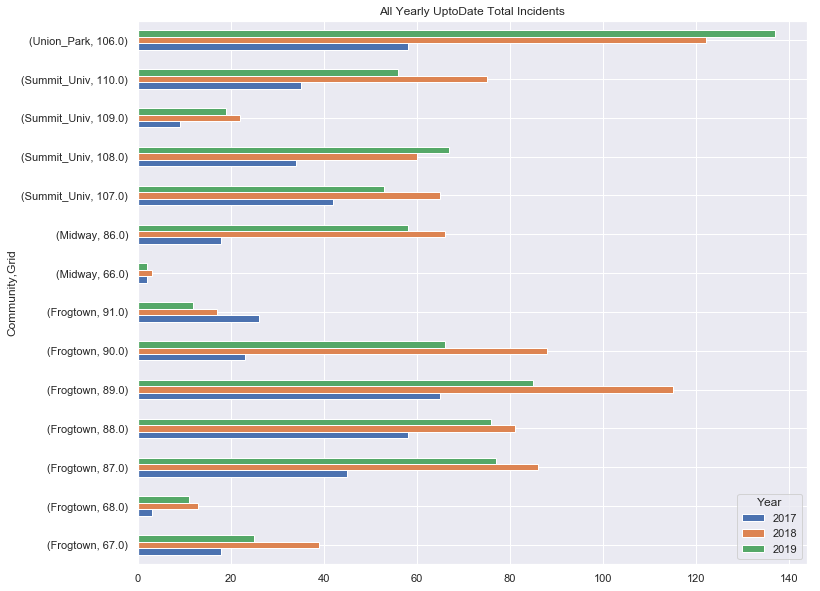

In [59]:
plot_toDate_Year_Crime(Incident='All',Day=Max)

### Frogtown Total Crimes toDate by Month <a name="fgd_month"></a>

What are some monthly trends

In [49]:
table_toDate_Month_Crime(Incident='All',Day=Max)

This table maps All incidents up to Day 107


Month                1              2              3              4          
Year              2017 2018 2019 2017 2018 2019 2017 2018 2019 2017 2018 2019
Community   Grid                                                             
Frogtown    67.0     1   11    5    2    9    7    7   15    5    8    4    8
            68.0     0    4    3    0    0    3    2    8    4    1    1    1
            87.0     2   27   19    2   33   21   20   14   26   21   12   11
            88.0     2   18   26    4   26   19   35   25   20   17   12   11
            89.0     8   50   32    5   24   20   35   26   18   17   15   15
            90.0     0   32   16    3   18   20   14   29   19    6    9   11
            91.0     2    6    3    1    4    1   17    2    3    6    5    5
Midway      66.0     0    1    0    0    1    1    0    0    1    2    1    0
            86.0     2   27   14    5   12   13    8   18   22    3    9    9
Summit_Univ 107.0    7   18   23    4   17   10   19   22   12   12    8    8
            108.0    1    9   24    4   23   11   19   14   21   10   14   11
            109.0    1   10    3    2    6    8    3    2    5    3    4    3
            110.0    2   22   17    3   19   17   14   22   12   16   12   10
Union_Park  106.0    7   33   35    9   23   39   32   43   36   10   23   27

### Saint Paul Yearly Crime Comparison Up to Current Date (04/17/19) <a name="sp_crime"></a>

How do we compare to our neighbors and what are some trends?

This graph maps All incidents of Saint Paul neighborhoods up to Day 107


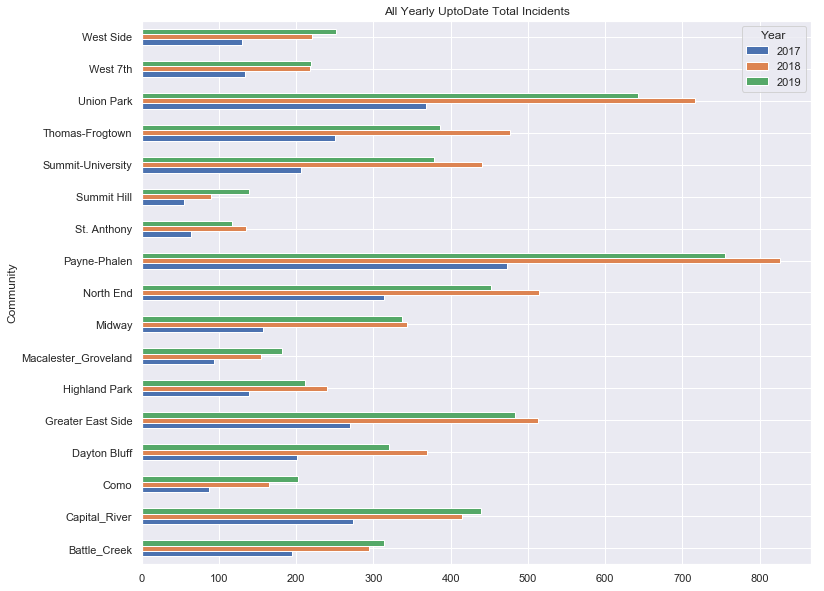

In [122]:
plot_toDate_Year_SPCrime(Incident='All',Day=Max)

## Frogtown Annual Crime Map (Default 2018) <a name="2018map"></a>
At least four crimes must occur in one location to be displayed

**NOTE: It's interactive, click on the circles for more details on the total number and type of crimes committed**

In [11]:
plot_Frogtown_year(2018)

## Frogtown 2019 Crime Map w/ Proactive Visits <a name="2019map"></a>
The top 5 crime categories are denoted in text; Green Circle indicates proactive visits
**Proactive visits** entails police officer visiting a place for outreach and not responding to a call

**NOTE: It's interactive, click on the circles for more details!**

In [92]:
plot_Frogtown_year_proactive(2019)

## Frogtown Violent Crimes Map from 2017 to Present  <a name="violent"></a>

Violent crimes are less salient or apparent to community members as compared to community members. We can see which areas/ blocks are safer.  

* Orange= 2017
* Green= 2018
* Purple= 2019

In [180]:
plot_Frogtown_long_crime('Violent')

### Frogtown 2019 Multi-Crime Map  <a name="multi"></a>

* Purple= Discharge
* Green= Autotheft
* Orange= Theft
* Blue= Burglary
* Brown= Narcotics
* Red= Vandalism

In [184]:
plot_multicrime_byYear()

### Hotspots near Frogtown from 2018 to present <a name="hotspot"></a>

Notice the address codes are masked and count is limited to 20

In [140]:
B=fgc.query('Year in [2018,2019]')
B=B[['Block','Count']].groupby(['Block']).sum().reset_index()
B.columns=['Block_Intersection','Count']
B.query('Count>19').sort_values(['Count'], ascending=False)

,Block_Intersection,Count
173,130x university av w,356
366,42x rice st,80
145,123x university av w,67
336,39x lexington pa n,54
993,95x lexington pa n,46
239,27x lexington pa n,45
577,62x aurora av,37
583,62x rice st,28
757,75x milton st n,27
315,37x lexington pa n,26


### Frogtown Hotspot Interactive map from 2018 to present <a name="hotspot"></a>

* The bubbles are **not to scale** across the different categories to make this map more accessible. You  may need to zoom in to distinguish points
* The graph is **Interactive**; if you click on a point, it will list the number and  type of incidents in that area
* Legend
    * Orange: Number of Incidents greater than 10 and less than 20
    * Green: Number of Incidents greater than 20 and less than 50
    * Purple: Number of Incident greater than 50 


In [141]:
plot_Frogtown_hot_spot()

## Frogtown Gun Discharge Reports<a name="discharge"></a>


We hear it **all** the time from many people that our awarness of shootings is based on connection to social media and officials suggesting it is safer now than years prior. Is this true? Well, let's find out. It's worth noting that weather conditions can influence the frequency of when shootings occur. Finally, shootings may mix with other crimes 

**Why focus on shootings?**

Shootings can harm innocent bystanders and creates a significant sense of fear because it can be heard from a distance. It is one of the more salient crimes.

First let's construct graph a table showing the total number of shootings up to current date in comparison to previous years. Notice, that many grids are experiencing different trends, so it can be true that some neighbors are exposing more shootings and less shootings.


This table maps Discharge incidents up to Day 107


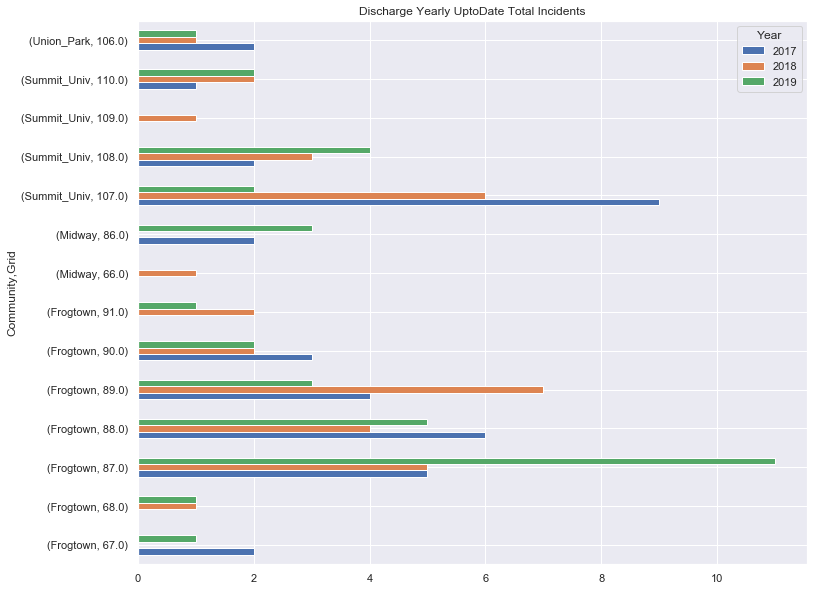

In [67]:
plot_toDate_Year_Crime(Incident='Discharge',Day=Max)

What are some trends at the city-wide level?

This graph maps Discharge incidents of Saint Paul neighborhoods up to Day 107


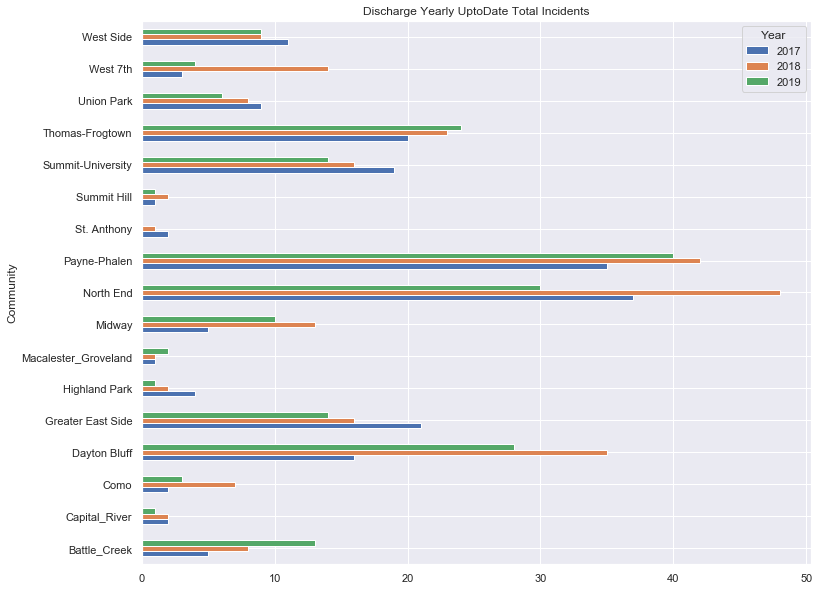

In [123]:
plot_toDate_Year_SPCrime(Incident='Discharge',Day=Max)

The table below displays the number of shootings by grid in Frogtown broken by month over the last two years

In [156]:
table_toDate_Month_Crime(Incident='Discharge',Day=Max)

This table maps Discharge incidents up to Day 107


Month                      1              2              3              4  \
Year                    2017 2018 2019 2017 2018 2019 2017 2018 2019 2017   
Community         Grid                                                      
Midway            66.0     0    0    0    0    0    0    0    0    0    0   
                  86.0     0    0    1    2    0    0    0    0    1    0   
Summit-University 107.0    3    1    2    0    3    0    6    1    0    0   
                  108.0    0    0    1    0    1    1    1    1    0    1   
                  109.0    0    0    0    0    1    0    0    0    0    0   
                  110.0    0    1    0    0    0    1    1    0    0    0   
Thomas-Frogtown   67.0     0    0    0    1    0    0    1    0    0    0   
                  68.0     0    1    0    0    0    0    0    0    1    0   
                  87.0     0    1    3    0    1    1    1    1    4    4   
                  88.0     0    2    3    1    0    2    4    1    0    1   
                  89.0     0    6    1    0    1    1    1    0    1    3   
                  90.0     0    0    0    0    0    0    2    1    1    1   
                  91.0     0    0    0    0    0    0    0    1    1    0   
Union Park        106.0    1    1    0    0    0    1    1    0    0    0   

Month                              
Year                    2018 2019  
Community         Grid             
Midway            66.0     1    0  
                  86.0     0    1  
Summit-University 107.0    1    0  
                  108.0    1    2  
                  109.0    0    0  
                  110.0    1    1  
Thomas-Frogtown   67.0     0    1  
                  68.0     0    0  
                  87.0     2    3  
                  88.0     1    0  
                  89.0     0    0  
                  90.0     1    1  
                  91.0     1    0  
Union Park        106.0    0    0

### Frogtown UptoDate gun discharge map  2017 to Present (interactive) <a name="fgd_dis"></a>

A police Grid can cover a lot of area. From the map we can spot parts of the community that are currently vulnerable and those in the past.

* Orange= 2017
* Green= 2018
* Purple= 2019

In [143]:
plot_Frogtown_long_crime_todate(Incident='Discharge',Day=Max)

This map displays Discharge incidents up to Day 107


### Frogtown UptoDate Daytime Discharge Map <a name="fgd_day"></a>

Daytime shooting are particularly concerning to our community as there as there are greater frequency of innocent bystanders being harmed and can influence community members behavior to go outside or parents decision to let their kids play. 

* Orange= 2017
* Green= 2018
* Purple= 2019

In [99]:
plot_Frogtown_long_crime_daytime_todate(Incident='Discharge',Day=Max)

This map displays Discharge incidents up to Day 107 from 7AM to 8PM


### Frogtown yearly gun discharge from 2017 to Present  <a name="fgd_ann"></a>

Orange= 2017
Green= 2018
Purple= 2019

In [154]:
plot_Frogtown_long_crime_todate('Discharge')

### Firearm Usage (Any crime involving it) <a name="firearm"></a>

Often firearms are used when committing another crime, but does not need to be fired. 

In [182]:
fgc_fire=fgc[fgc['IncType'].str.contains("Firearm")]
print('The total crimes involving firearms in Frogtown Area')
fgc_fire['Incident'].value_counts()

The total crimes involving firearms in Frogtown Area


Discharge    881
Robbery      229
Violent      193
Name: Incident, dtype: int64

This graph maps Firearm incidents up to Day 107


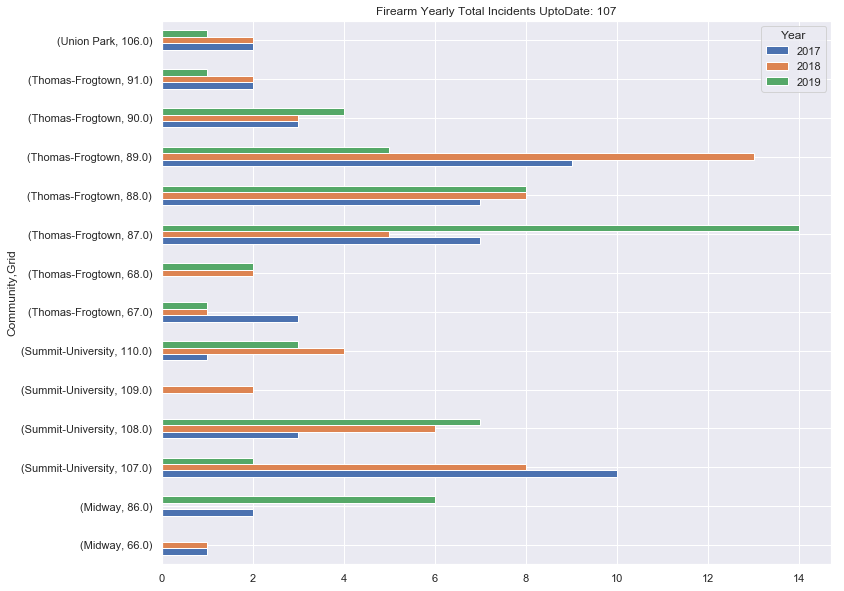

In [181]:
plot_toDate_Year_Firearm(Day=Max)

In [94]:
plot_multicrime_byYear()

## Concluding Remarks <a name="conclude"></a>

From the data above, we can visually spot sections in the community and specific locations where crime is more frequent. It is important that we have a community discussion before taking any further action. Several agencies have already done some analysis and reports on crime data. If you have any question in regards to visualization and other things, please feel free to reach out to me.

## Functions <a name="func"></a>

#### Plot Multiple Crimes by Year

In [24]:
def plot_multicrime_byYear(Year=2019):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] == Year)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge']

    T=B.query('Theft==1')
    T=T[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

    V=B.query('Vandalism==1')
    V=V[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

    N=B.query('Narcotics==1')
    N=N[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

    A=B.query('Incident=="Auto Theft"')
    A=A[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

    D=B.query('Discharge==1')
    D=D[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

    Br=B.query('Burglary==1')
    Br=Br[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

#Create Frogtown GeoMap
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")

    for index, row in T.iterrows(): 
        popup_text = "Address: {}<br> total theft incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Count']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count'] +3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)

    for index, row in V.iterrows(): 
        popup_text = "Address: {}<br> total vandalism incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Count']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count'] +3,
                            color="#FF0000",
                            popup=popup_text,
                            fill=True).add_to(FG_map)    

    for index, row in N.iterrows(): 
        popup_text = "Address: {}<br> total narcotics incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Narcotics']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Narcotics'] + 3,
                            color="#654321",
                            popup=popup_text,
                            fill=True).add_to(FG_map)     

    for index, row in A.iterrows(): 
        popup_text = "Address: {}<br> total autotheft incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Count']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count'] +3,
                            color='#007849',
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    for index, row in D.iterrows(): 
        popup_text = "Address: {}<br> total discharge incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Count']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count'] +3,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(FG_map)    

    for index, row in Br.iterrows(): 
        popup_text = "Address: {}<br> total burglary incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Count']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count'] +3,
                            color="#0000ff",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    return FG_map

#### Plot Crime Map by Year

In [25]:


def plot_Frogtown_year(Year=2018):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] == Year)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson']
    B=B[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    B=B.query('Count>3')
    
    # for each row in the data, add a cicle marker
    for index, row in B.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    return FG_map


In [72]:
#interact(plot_Frogtown_year, Year=widgets.IntSlider(min=2014,max=2019,step=1,value=2018));

#### Plot Crime Map by Year w/ proactive visits

In [26]:
def plot_Frogtown_year_proactive(Year=2018):
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    B= fgc[(fgc['Year'] == Year)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson']
    B=B[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    
    A= fgp[(fgp['Year'] == Year)]
    A= A.groupby(['Block','Latitude','Longitude']).size().reset_index()
    A.columns=['Block','Latitude','Longitude','Count'] 
    
    for index, row in B.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)

    for index, row in A.iterrows(): 
        popup_text = "Address: {}<br> total proactive calls: {}"
        popup_text = popup_text.format(row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)  
        
    return FG_map

#### Plot Longitudinal Crime Compared by Year

In [27]:
def plot_Frogtown_long_crime(Incident='Discharge'):
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson','Year']

    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    B= fgc[(fgc['Incident'] == Incident)]
    B17=B.query('Year == 2017')
    B17=B17[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B18=B.query('Year == 2018')
    B18=B18[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B19=B.query('Year == 2019')
    B19=B19[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()

    for index, row in B17.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B18.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"], row["Longitude"]),
                            radius=row['Count']+3,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B19.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(FG_map)    
    
    return FG_map

In [13]:
#interact(plot_Frogtown_long_crime, Incident=['Discharge','Violent','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Robbery','Domestic Assault','Arson'])

#### Plot Longitudinal Crime Compared by Year; todate

In [58]:

def plot_Frogtown_long_crime_todate(Incident='All',Day=Max):
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson','Year']

    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    if Incident=='All':
        B= fgc
    else: 
        B= fgc[(fgc['Incident'] == Incident)]
    B= B[(B['DayYear'] <= Day)]
    B17=B.query('Year == 2017')
    B17=B17[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B18=B.query('Year == 2018')
    B18=B18[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B19=B.query('Year == 2019')
    B19=B19[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    print('This map displays {} incidents up to Day {}'.format(Incident,Day))
    for index, row in B17.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B18.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"], row["Longitude"]),
                            radius=row['Count']+3,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B19.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(FG_map)    
    
    return FG_map

#### Plot Longitudinal Daytime Crime Compared by Year; todate

In [97]:

def plot_Frogtown_long_crime_daytime_todate(Incident='All',Day=Max):
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson','Year']

    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    if Incident=='All':
        B= fgc
    else: 
        B= fgc[(fgc['Incident'] == Incident)]
    B= B[(B['DayYear'] <= Day)]
    B= B.query('Hour >= 6 and Hour <20')
    B17=B.query('Year == 2017')
    B17=B17[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B18=B.query('Year == 2018')
    B18=B18[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B19=B.query('Year == 2019')
    B19=B19[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    print('This map displays {} incidents up to Day {} from 7AM to 8PM'.format(Incident,Day))
    for index, row in B17.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B18.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"], row["Longitude"]),
                            radius=row['Count']+3,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B19.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(FG_map)    
    
    return FG_map

#### Crime Table toDate by Month 

In [158]:
#convert MOnth
def Convert_Month(num):
    Months= ['January','February','March','April','May','June','July','August','September','October','November','December']
    for i in range(12):
        if num==(i+1):
            Xi=Months[i]
    return Xi 

def table_toDate_Month_Crime(Incident='All',Day=Max):
    if Incident=='All':
        B= fgc
    else: 
        B= fgc[(fgc['Incident'] == Incident)]
    B= B[(B['DayYear'] <= Day)]
    B=B.query('Year >= 2017')
    Index= ['Year','Grid','Count','Month']
    C= B[Index].groupby(['Year','Grid','Month']).sum().reset_index()
    C['Month_Name']= C.Month.apply(Convert_Month) 
    C['Community']= C.Grid.apply(commun)
    print('This table maps {} incidents up to Day {}'.format(Incident,Day))
    return pd.pivot_table(C, values='Count', index=['Community','Grid'], columns=['Month', 'Year'], fill_value=0)



#### Crime Plot toDate by Year

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_toDate_Year_Crime(Incident='All',Day=Max):
    if Incident=='All':
        B= fgc
    else: 
        B= fgc[(fgc['Incident'] == Incident)]
    B=B.query('Year >= 2017')
    B= B[(B['DayYear'] <= Day)]
    Index= ['Year','Grid','Count']
    C= B[Index].groupby(['Year','Grid']).sum().reset_index()
    C['Community']= C.Grid.apply(commun) 
    print('This graph maps {} incidents up to Day {}'.format(Incident,Day))
    sns.set()
    pd.pivot_table(C, values='Count', index=['Community','Grid'], columns=['Year'], 
                          fill_value=0).plot(kind= 'barh', 
                                             figsize=(12,10),title= Incident + ' Yearly Total Incidents UptoDate: '+ str(Day))
    return plt.show()

# Firearm Plot
def plot_toDate_Year_Firearm(Day=Max):
    B= fgc_fire[(fgc_fire['DayYear'] <= Day)]
    B= B.query('Year>2016')
    Index= ['Year','Grid','Count']
    C= B[Index].groupby(['Year','Grid']).sum().reset_index()
    C['Community']= C.Grid.apply(commun) 
    print('This graph maps Firearm incidents up to Day {}'.format(Day))
    sns.set()
    pd.pivot_table(C, values='Count', index=['Community','Grid'], columns=['Year'], 
                          fill_value=0).plot(kind= 'barh', 
                                             figsize=(12,10),title= 'Firearm Yearly Total Incidents UptoDate: ' + str(Day))
    return plt.show()

#### Latenight Crime Plot by Year

In [7]:
def plot_Frogtown_year_Latenight(Year=2018):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] == Year)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson']
    BM=B.query('LateNight ==0')
    BM=BM[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    BM=BM.query('Count>2')
    BL=B.query('LateNight ==1')
    BL=BL[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    BL=BL.query('Count>2')
    
    # for each row in the data, add a cicle marker
    for index, row in BM.iterrows(): 
        popup_text = "Year: {} Non-late<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)

    for index, row in BL.iterrows(): 
        popup_text = "Year: {} Late<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)        
    return FG_map


In [16]:
#plot_Frogtown_year_Latenight(2018)

#### Frogtown  Plot by Year and month

In [6]:
def plot_Frogtown_yearmonth(Year=2018,Month=1):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] == Year)]
    B= B[(B['Month'] == Month)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge']
    B=B[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    

    # for each row in the data, add a cicle marker
    for index, row in B.iterrows(): 
        Other= row['Count'] - row['Theft'] - row['Vandalism'] - row['Narcotics'] -row['Auto Theft'] - row['Burglary'] - row['Discharge']
        popup_text = "Year: {} Month: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Other: {}"
        popup_text = popup_text.format(str(Year), str(Month),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Narcotics'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], Other) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    return FG_map


In [10]:
#plot_Frogtown_yearmonth(2018,1)
interact(plot_Frogtown_yearmonth, Year=widgets.IntSlider(min=2014,max=2019,step=1,value=2018),\
         Month=[('January', 1), ('February', 2), ('March',3), ('April',4), ('May',5) ,('June',6),('July',7)]);

interactive(children=(IntSlider(value=2018, description='Year', max=2019, min=2014), Dropdown(description='Mon…

#### Frogtown plot by year and hour

In [5]:
def plot_Frogtown_yearhour(Year=2018,Hour=0):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] == Year)]
    B= B[(B['Hour'] == Hour)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge']
    B=B[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    

    # for each row in the data, add a cicle marker
    for index, row in B.iterrows(): 
        Other= row['Count'] - row['Theft'] - row['Vandalism'] - row['Narcotics'] -row['Auto Theft'] - row['Burglary'] - row['Discharge']
        popup_text = "Year: {} Hour: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Other: {}"
        popup_text = popup_text.format(str(Year), str(Hour),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Narcotics'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], Other) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    return FG_map

#### Frogtown Hotspot Map

In [ ]:
def plot_Frogtown_hot_spot(Year=2018):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] >= Year)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson']
    B=B[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    C=B.query('Count>9 and Count < 21')
    D=B.query('Count>20 and Count < 51')
    E=B.query('Count>50')
    
    # for each row in the data, add a cicle marker
    for index, row in C.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']/2,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
 
    for index, row in D.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']/5,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    for index, row in E.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']/9,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(FG_map)        

    return FG_map

### Functions all <a name="runall"></a>

Run to activate all functions

In [178]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd
import numpy as np
%matplotlib inline 
import folium
import warnings
warnings.filterwarnings('ignore')

#Upload Data
fg = pd.read_csv('FGCrime_Final.csv')

#Set max limit for uptodate function
Max= fg.loc[1,'Day_Max']

fgp= fg.query('Code in [9954]') # Specify proactive calls
fgc= fg.query('Code not in [9954,9959]') #specify all crime related police visits
fgc_Date= fgc[(fgc['DayYear'] <= Max)] #this specifies to date df
fgc_fire=fgc[fgc['IncType'].str.contains("Firearm")] #specifies all firearm

def plot_multicrime_byYear(Year=2019):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] == Year)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge']

    T=B.query('Theft==1')
    T=T[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

    V=B.query('Vandalism==1')
    V=V[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

    N=B.query('Narcotics==1')
    N=N[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

    A=B.query('Incident=="Auto Theft"')
    A=A[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

    D=B.query('Discharge==1')
    D=D[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

    Br=B.query('Burglary==1')
    Br=Br[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()

#Create Frogtown GeoMap
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")

    for index, row in T.iterrows(): 
        popup_text = "Address: {}<br> total theft incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Count']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count'] +3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)

    for index, row in V.iterrows(): 
        popup_text = "Address: {}<br> total vandalism incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Count']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count'] +3,
                            color="#FF0000",
                            popup=popup_text,
                            fill=True).add_to(FG_map)    

    for index, row in N.iterrows(): 
        popup_text = "Address: {}<br> total narcotics incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Narcotics']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Narcotics'] + 3,
                            color="#654321",
                            popup=popup_text,
                            fill=True).add_to(FG_map)     

    for index, row in A.iterrows(): 
        popup_text = "Address: {}<br> total autotheft incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Count']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count'] +3,
                            color='#007849',
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    for index, row in D.iterrows(): 
        popup_text = "Address: {}<br> total discharge incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Count']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count'] +3,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(FG_map)    

    for index, row in Br.iterrows(): 
        popup_text = "Address: {}<br> total burglary incidents: {}"
        popup_text = popup_text.format(row["Block"],row['Count']) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count'] +3,
                            color="#0000ff",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    return FG_map

def plot_Frogtown_year(Year=2018):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] == Year)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson']
    B=B[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    B=B.query('Count>3')
    
    # for each row in the data, add a cicle marker
    for index, row in B.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    return FG_map


def plot_Frogtown_year_proactive(Year=2018):
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    B= fgc[(fgc['Year'] == Year)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson']
    B=B[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    
    A= fgp[(fgp['Year'] == Year)]
    A= A.groupby(['Block','Latitude','Longitude']).size().reset_index()
    A.columns=['Block','Latitude','Longitude','Count'] 
    
    for index, row in B.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)

    for index, row in A.iterrows(): 
        popup_text = "Address: {}<br> total proactive calls: {}"
        popup_text = popup_text.format(row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)  
        
    return FG_map

def plot_Frogtown_long_crime(Incident='Discharge'):
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson','Year']

    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    B= fgc[(fgc['Incident'] == Incident)]
    B17=B.query('Year == 2017')
    B17=B17[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B18=B.query('Year == 2018')
    B18=B18[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B19=B.query('Year == 2019')
    B19=B19[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()

    for index, row in B17.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B18.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"], row["Longitude"]),
                            radius=row['Count']+3,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B19.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(FG_map)    
    
    return FG_map

def plot_Frogtown_long_crime_todate(Incident='All',Day=Max):
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson','Year']

    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    if Incident=='All':
        B= fgc
    else: 
        B= fgc[(fgc['Incident'] == Incident)]
    B= B[(B['DayYear'] <= Day)]
    B17=B.query('Year == 2017')
    B17=B17[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B18=B.query('Year == 2018')
    B18=B18[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B19=B.query('Year == 2019')
    B19=B19[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    print('This map displays {} incidents up to Day {}'.format(Incident,Day))
    for index, row in B17.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B18.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"], row["Longitude"]),
                            radius=row['Count']+3,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B19.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(FG_map)    
    
    return FG_map

#convert MOnth
def Convert_Month(num):
    Months= ['January','February','March','April','May','June','July','August','September','October','November','December']
    for i in range(12):
        if num==(i+1):
            Xi=Months[i]
    return Xi

#Community function
def commun(x): 
    if x in [67,68,87,88,89,90,91,92]:
        return 'Thomas-Frogtown'
    elif x in [5,6,7,8,25,26,27,28,45,46,47,48]:
        return 'Como'
    elif x in [107, 108, 109, 110,127,128,129,130]: 
        return 'Summit-University'
    elif x in [101,102,103,104,105,106,122,123,124,125,126]: 
        return 'Union Park'
    elif x in [63,64,65,66,83,84,85,86]: 
        return 'Midway' 
    elif x in [142,143,144,145,146,162,163,164,165,166]:
        return 'Macalester_Groveland'
    elif x in [182,183,184,185,186,202,203,204,205,206,223,224,225,242,243,244,245,246]:
        return 'Highland Park'
    elif x in [147,148,149,167,168]:
        return 'Summit Hill'
    elif x in [1,2,21,22,43,44,61,62,81,82]:
        return 'St. Anthony'
    elif x in [226,207,187,188,189,267,268,169,170,171,249,150,151,230]:
        return 'West 7th'
    elif x in [209,210,211,212,213,214,215,192,193,194,195,172,173,174,175]:
        return 'West Side'
    elif x in [111,112,131,132,133,152,153]:
        return 'Capital_River'
    elif x in [98,99,100,118,119,119,120,137,138,139,140,160,197,180,200,240,280]:
        return 'Battle_Creek'
    elif x in [76,95,96,97,115,116,117,138,114,136]:
        return 'Dayton Bluff' 
    elif x in [9,10,11,12,29,30,31,32,49,50,51,52,269,69,70,71,72]:
        return 'North End'
    elif x in [13,14,15,16,33,34,35,36,53,54,55,56,73,74,75,93,94]:
        return 'Payne-Phalen'
    elif x in [17,18,19,20,37,38,39,40,56,57,58,59,60,77,78,79,80]:
        return 'Greater East Side'
    else: 
        return 'NaN'

def table_toDate_Month_Crime(Incident='All',Day=Max):
    if Incident=='All':
        B= fgc
    else: 
        B= fgc[(fgc['Incident'] == Incident)]
    B= B[(B['DayYear'] <= Day)]
    B=B.query('Year >= 2017')
    Index= ['Year','Grid','Count','Month']
    C= B[Index].groupby(['Year','Grid','Month']).sum().reset_index()
    C['Month_Name']= C.Month.apply(Convert_Month) 
    C['Community']= C.Grid.apply(commun)
    print('This table maps {} incidents up to Day {}'.format(Incident,Day))
    return pd.pivot_table(C, values='Count', index=['Community','Grid'], columns=['Month', 'Year'], fill_value=0)


import matplotlib.pyplot as plt
import seaborn as sns

def plot_toDate_Year_Crime(Incident='All',Day=Max):
    if Incident=='All':
        B= fgc
    else: 
        B= fgc[(fgc['Incident'] == Incident)]
    B=B.query('Year >= 2017')
    B= B[(B['DayYear'] <= Day)]
    Index= ['Year','Grid','Count']
    C= B[Index].groupby(['Year','Grid']).sum().reset_index()
    C['Community']= C.Grid.apply(commun) 
    print('This graph maps {} incidents up to Day {}'.format(Incident,Day))
    sns.set()
    pd.pivot_table(C, values='Count', index=['Community','Grid'], columns=['Year'], 
                          fill_value=0).plot(kind= 'barh', 
                                             figsize=(12,10),title= Incident + ' Yearly Total Incidents UptoDate: '+ str(Day))
    return plt.show()

# Firearm Plot
def plot_toDate_Year_Firearm(Day=Max):
    B= fgc_fire[(fgc_fire['DayYear'] <= Day)]
    B= B.query('Year>2016')
    Index= ['Year','Grid','Count']
    C= B[Index].groupby(['Year','Grid']).sum().reset_index()
    C['Community']= C.Grid.apply(commun) 
    print('This graph maps Firearm incidents up to Day {}'.format(Day))
    sns.set()
    pd.pivot_table(C, values='Count', index=['Community','Grid'], columns=['Year'], 
                          fill_value=0).plot(kind= 'barh', 
                                             figsize=(12,10),title= 'Firearm Yearly Total Incidents UptoDate: ' + str(Day))
    return plt.show()

def plot_Frogtown_year_Latenight(Year=2018):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] == Year)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson']
    BM=B.query('LateNight ==0')
    BM=BM[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    BM=BM.query('Count>2')
    BL=B.query('LateNight ==1')
    BL=BL[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    BL=BL.query('Count>2')
    
    # for each row in the data, add a cicle marker
    for index, row in BM.iterrows(): 
        popup_text = "Year: {} Non-late<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)

    for index, row in BL.iterrows(): 
        popup_text = "Year: {} Late<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)        
    return FG_map


def plot_Frogtown_yearmonth(Year=2018,Month=1):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] == Year)]
    B= B[(B['Month'] == Month)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge']
    B=B[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    

    # for each row in the data, add a cicle marker
    for index, row in B.iterrows(): 
        Other= row['Count'] - row['Theft'] - row['Vandalism'] - row['Narcotics'] -row['Auto Theft'] - row['Burglary'] - row['Discharge']
        popup_text = "Year: {} Month: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Other: {}"
        popup_text = popup_text.format(str(Year), str(Month),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Narcotics'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], Other) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    return FG_map


def plot_Frogtown_yearhour(Year=2018,Hour=0):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] == Year)]
    B= B[(B['Hour'] == Hour)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge']
    B=B[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    

    # for each row in the data, add a cicle marker
    for index, row in B.iterrows(): 
        Other= row['Count'] - row['Theft'] - row['Vandalism'] - row['Narcotics'] -row['Auto Theft'] - row['Burglary'] - row['Discharge']
        popup_text = "Year: {} Hour: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Other: {}"
        popup_text = popup_text.format(str(Year), str(Hour),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Narcotics'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], Other) 
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    return FG_map


def plot_Frogtown_long_crime_daytime_todate(Incident='All',Day=Max):
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson','Year']

    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    if Incident=='All':
        B= fgc
    else: 
        B= fgc[(fgc['Incident'] == Incident)]
    B= B[(B['DayYear'] <= Day)]
    B= B.query('Hour >= 6 and Hour <20')
    B17=B.query('Year == 2017')
    B17=B17[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B18=B.query('Year == 2018')
    B18=B18[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    B19=B.query('Year == 2019')
    B19=B19[Index].groupby(['Year','Block','Latitude','Longitude']).sum().reset_index()
    print('This map displays {} incidents up to Day {} from 7AM to 8PM'.format(Incident,Day))
    for index, row in B17.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B18.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"], row["Longitude"]),
                            radius=row['Count']+3,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
    
    for index, row in B19.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}"
        popup_text = popup_text.format(row["Year"],row["Block"], row['Count'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']+3,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(FG_map)    
    
    return FG_map

#hotspot map

def plot_Frogtown_hot_spot(Year=2018):
    # generate a new map
    FG_map = folium.Map(location=[44.958326, -93.122926], zoom_start=14,tiles="OpenStreetMap")
    
    #setup
    B= fgc[(fgc['Year'] >= Year)]
    Index =['Block','Latitude','Longitude', 'Count','Theft','Vandalism','Narcotics','Auto Theft','Burglary','Discharge'\
            ,'Robbery','Domestic Assault','Violent','Arson']
    B=B[Index].groupby(['Block','Latitude','Longitude']).sum().reset_index()
    C=B.query('Count>9 and Count < 21')
    D=B.query('Count>20 and Count < 51')
    E=B.query('Count>50')
    
    # for each row in the data, add a cicle marker
    for index, row in C.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']/2,
                            color="#E37222",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
 
    for index, row in D.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']/5,
                            color="#007849",
                            popup=popup_text,
                            fill=True).add_to(FG_map)
        
    for index, row in E.iterrows(): 
        popup_text = "Year: {}<br> Address: {}<br> total incidents: {}<br> Theft: {}<br> Vandalism: {}\
                            <br> Narcotics: {}<br> Auto Theft: {}<br> Burglary: {}<br> Discharge: {}<br> Robbery: {}\
                            <br> Domestic Assault: {}<br> Violent: {}<br> Arson: {}"
        popup_text = popup_text.format(str(Year),row["Block"], row['Count'], row['Theft'], row['Vandalism'], row['Robbery'],\
                            row['Auto Theft'], row['Burglary'], row['Discharge'], row['Domestic Assault'],\
                                  row['Domestic Assault'],row['Violent'],row['Arson'])
        folium.CircleMarker(location=(row["Latitude"],row["Longitude"]),
                            radius=row['Count']/9,
                            color="#800080",
                            popup=popup_text,
                            fill=True).add_to(FG_map)        

    return FG_map

#Read Data
df = pd.read_csv('Datasets/Crime_Incident_Report_-_Dataset.csv')
cols= ['Case','Date','Time','Code','IncType','Incident','Grid','NNum','Neighborhood','Block','CallDispCode','CallDisposition', 'Count']
df.columns= cols

#Add Time Variables
df= df[df.Case != 18254093] #messed up time variable
df['Date']= pd.to_datetime(df['Date'])
df['Year']= df['Date'].dt.year
df=df.query('Year > 2016')
df['DayYear'] = df['Date'].dt.dayofyear
df['Community']= df['Grid'].apply(commun)
df= df.query('Code not in [9954,9959] and Community !="NaN"')

def plot_toDate_Year_SPCrime(Incident='All',Day=Max):
    if Incident=='All':
        B= df
    else: 
        B= df[(df['Incident'] == Incident)]
    B= B[(B['DayYear'] <= Day)]
    Index= ['Year','Community','Count']
    C= B[Index].groupby(['Year','Community']).sum().reset_index()
    print('This graph maps {} incidents of Saint Paul neighborhoods up to Day {}'.format(Day))
    sns.set()
    pd.pivot_table(C, values='Count', index=['Community'], columns=['Year'], 
                          fill_value=0).plot(kind= 'barh', 
                                             figsize=(12,10),title= Incident + ' Yearly UptoDate Total Incidents')
    return plt.show()

### Saint Paul

In [168]:
#Read Data
df = pd.read_csv('Datasets/Crime_Incident_Report_-_Dataset.csv')
cols= ['Case','Date','Time','Code','IncType','Incident','Grid','NNum','Neighborhood','Block','CallDispCode','CallDisposition', 'Count']
df.columns= cols

#Add Time Variables
df= df[df.Case != 18254093] #messed up time variable
df['Date']= pd.to_datetime(df['Date'])
df['Year']= df['Date'].dt.year
df=df.query('Year > 2016')
df['DayYear'] = df['Date'].dt.dayofyear
df['Community']= df['Grid'].apply(commun)
df= df.query('Code not in [9954,9959] and Community !="NaN"')

def plot_toDate_Year_SPCrime(Incident='All',Day=Max):
    if Incident=='All':
        B= df
    else: 
        B= df[(df['Incident'] == Incident)]
    B= B[(B['DayYear'] <= Day)]
    Index= ['Year','Community','Count']
    C= B[Index].groupby(['Year','Community']).sum().reset_index()
    print('This graph maps {} incidents of Saint Paul neighborhoods up to Day {}'.format(Day))
    sns.set()
    pd.pivot_table(C, values='Count', index=['Community'], columns=['Year'], 
                          fill_value=0).plot(kind= 'barh', 
                                             figsize=(12,10),title= Incident + ' Yearly UptoDate Total Incidents')
    return plt.show()

